In [21]:
# library import
library(readr)
#install.packages('fpp2')
library(fpp2)
library(zoo)
library(tidyverse)

   project           Deployment.    unixtime_1000_gmt   datetime_pst      
 Length:48842       Min.   :3.000   Min.   :1.641e+12   Length:48842      
 Class :character   1st Qu.:3.000   1st Qu.:1.649e+12   Class :character  
 Mode  :character   Median :3.000   Median :1.656e+12   Mode  :character  
                    Mean   :3.068   Mean   :1.656e+12                     
                    3rd Qu.:3.000   3rd Qu.:1.664e+12                     
                    Max.   :4.000   Max.   :1.673e+12                     
                                                                          
    depth_m   parameter            units               value      
 Min.   :1   Length:48842       Length:48842       Min.   :12.78  
 1st Qu.:1   Class :character   Class :character   1st Qu.:15.64  
 Median :1   Mode  :character   Mode  :character   Median :17.68  
 Mean   :1                                         Mean   :18.40  
 3rd Qu.:1                                         3rd Qu.:21.12 

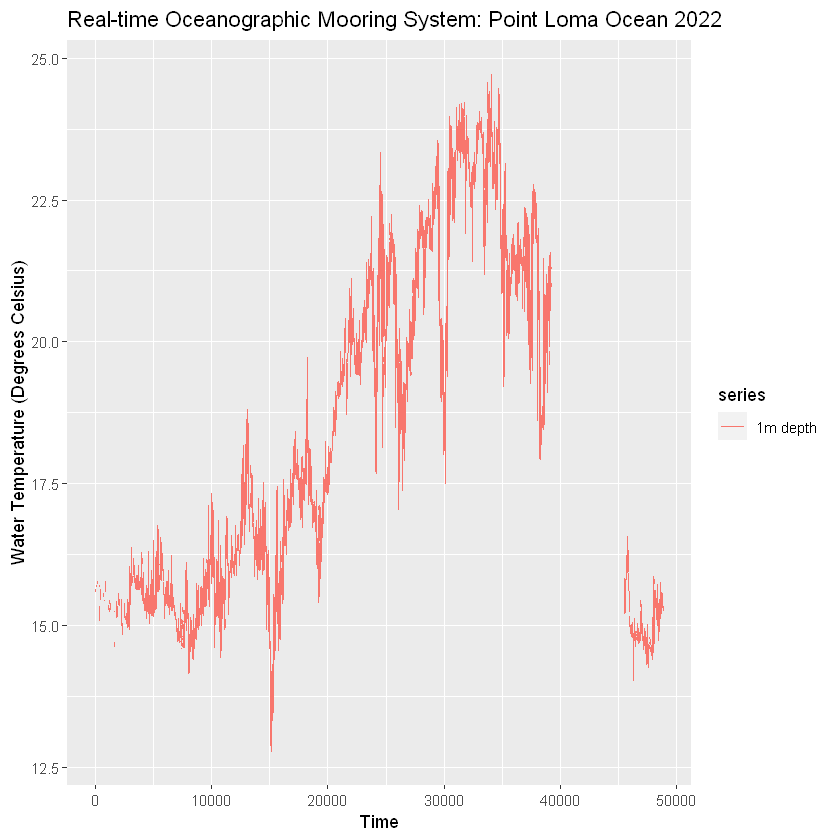

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  12.78   15.64   17.68   18.40   21.12   24.72    9376 

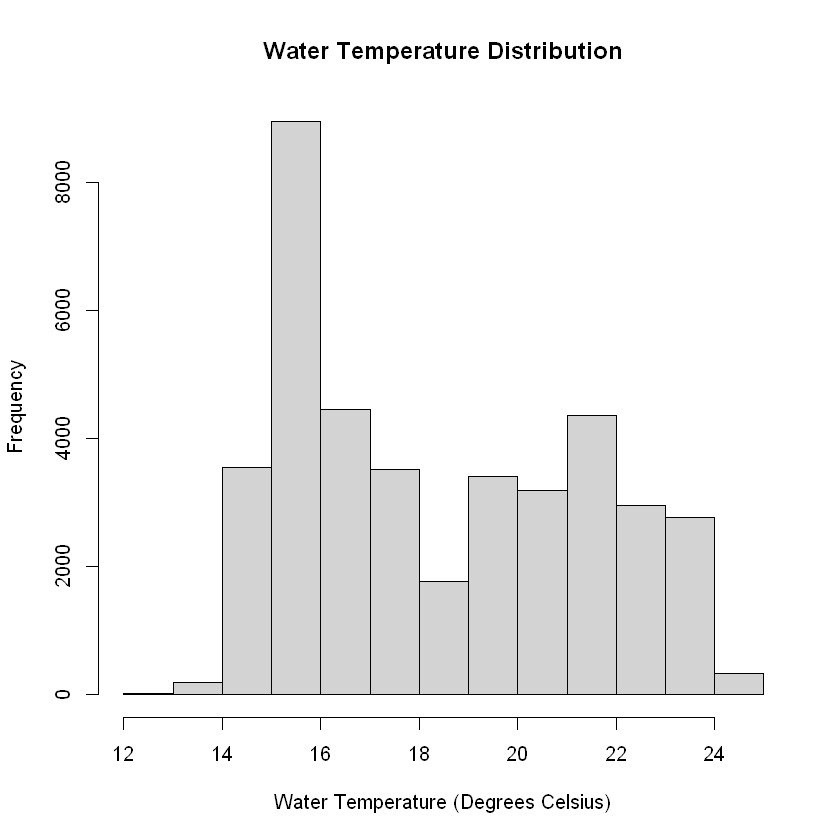

In [25]:
# read in data
df <- read.csv('PLOO_water_temperature_2022_datasd.csv')
# splice for only measurement readings at depth 1m
df_1m <- subset(df, depth_m==1)
summary(df_1m)

# Convert the start date string into a POSIXct object
df_1m$datetime_pst <- as.POSIXct(df_1m$datetime_pst, format='%Y-%m-%d %H:%M:%S')

# Create the time series
df_1m_ts <- ts(df_1m$value)
autoplot(df_1m_ts, main='Real-time Oceanographic Mooring System: Point Loma Ocean 2022', series='1m depth',
ylab='Water Temperature (Degrees Celsius)')

# see distribution of water temperatures
hist(df_1m$value, main='Water Temperature Distribution', xlab= 'Water Temperature (Degrees Celsius)')
summary(df_1m$value)

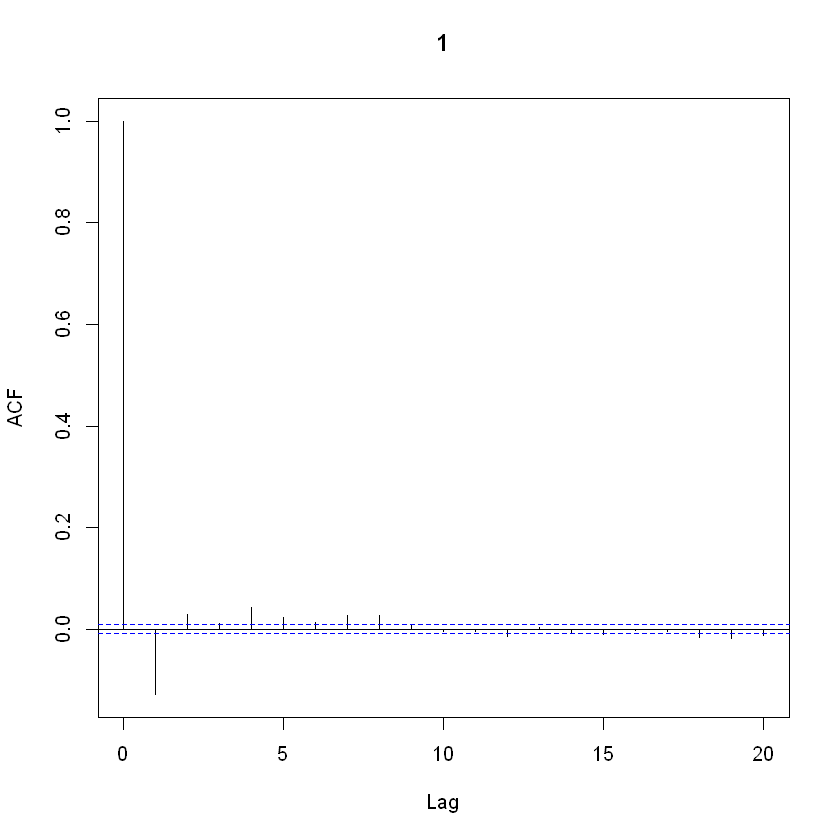

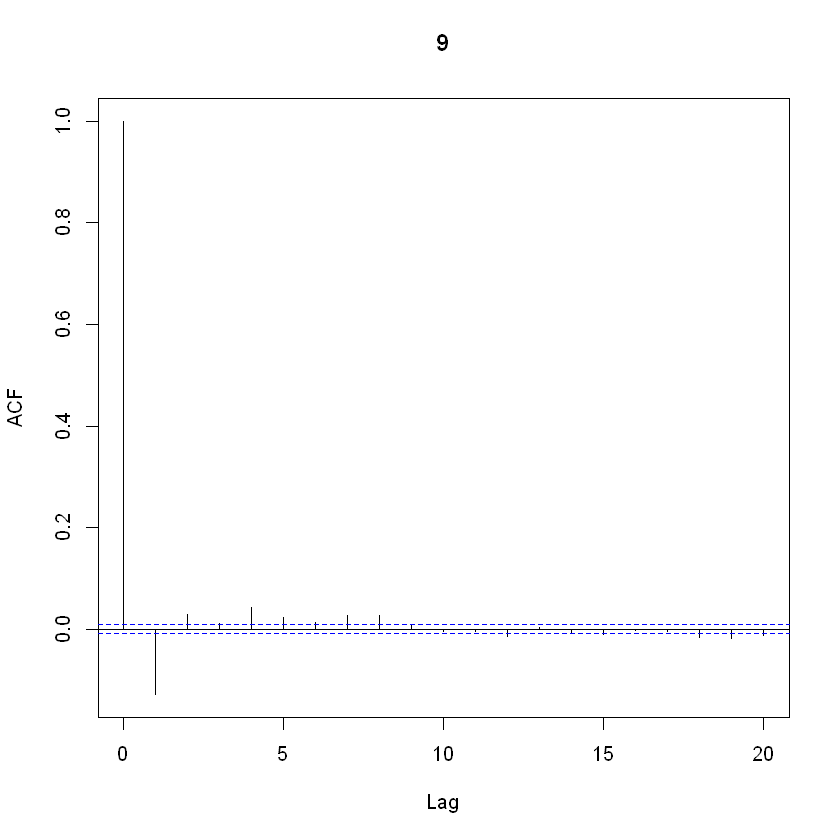

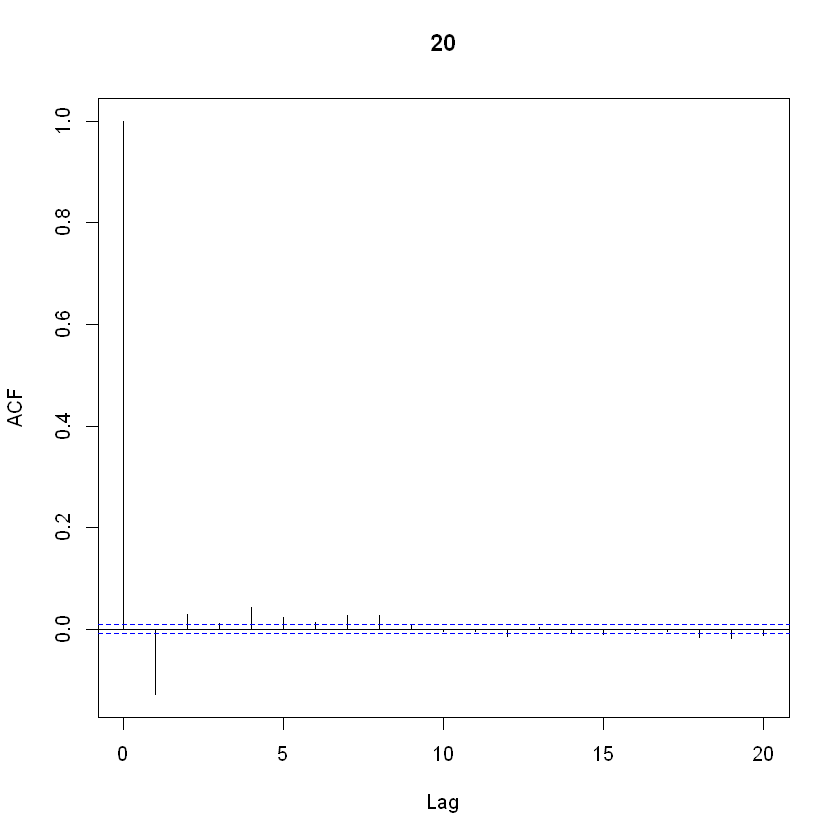

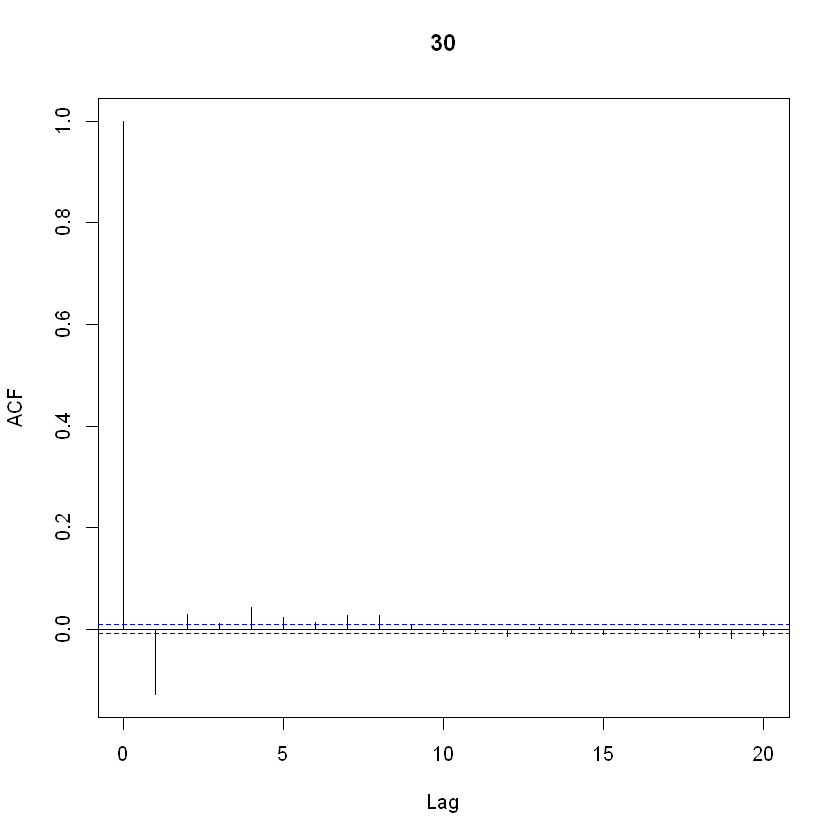

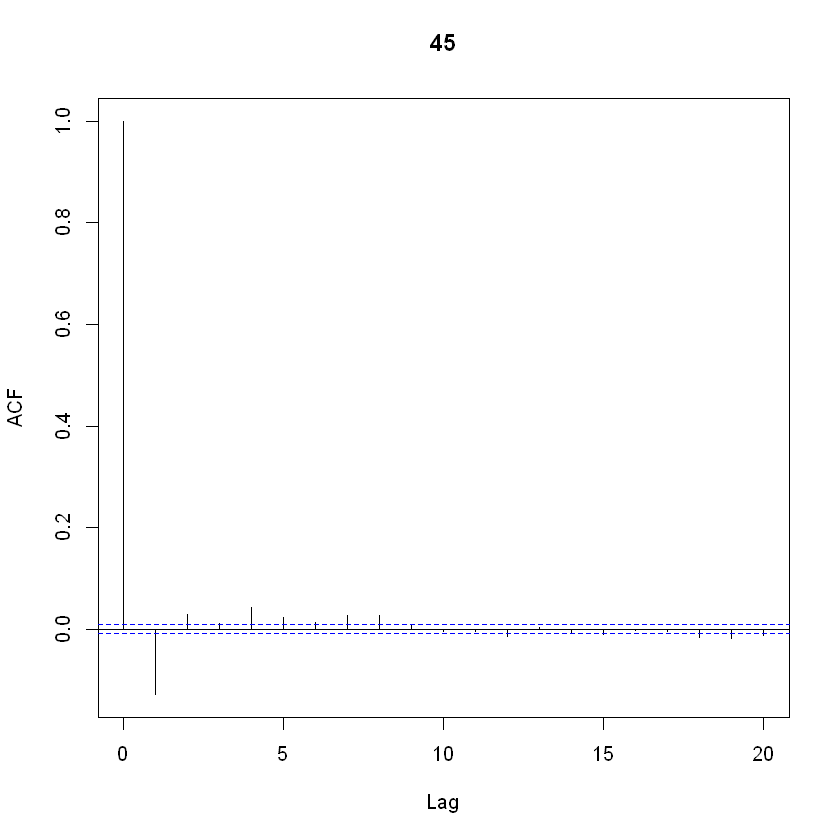

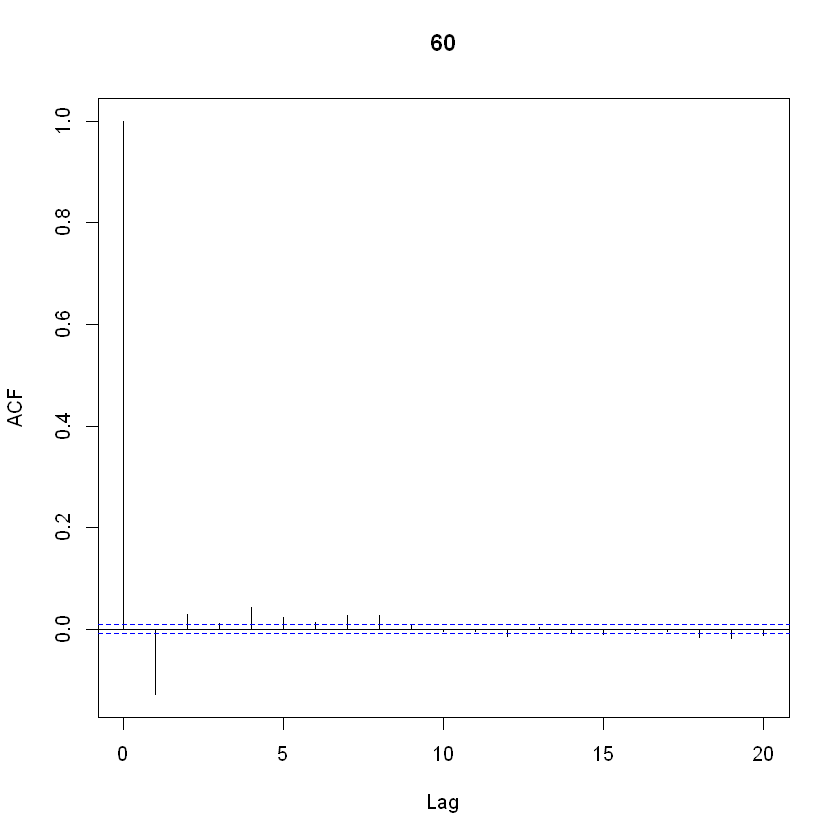

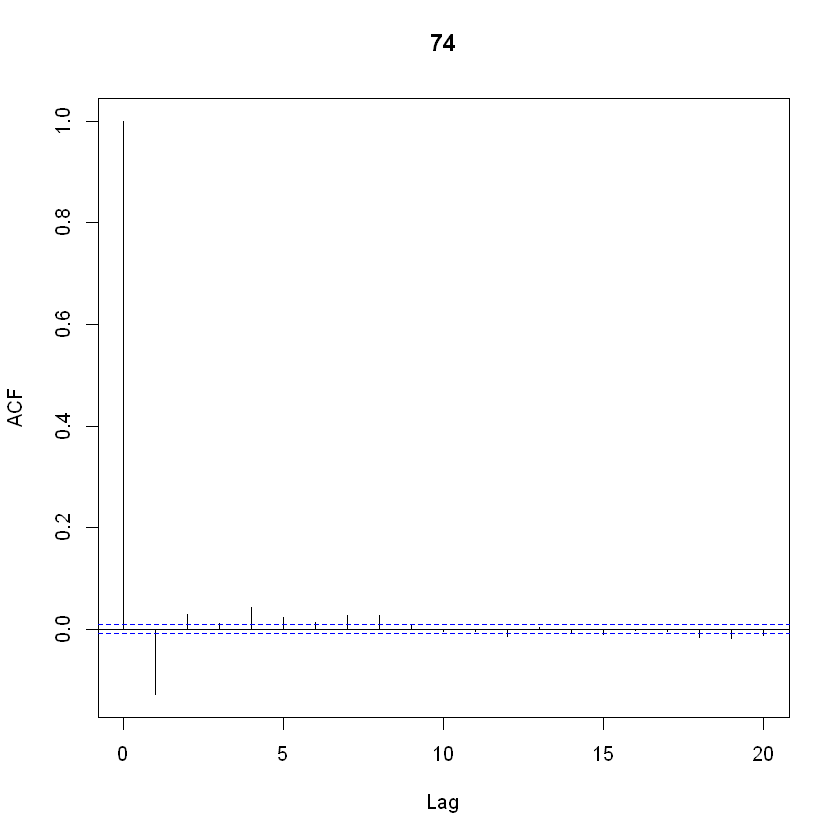

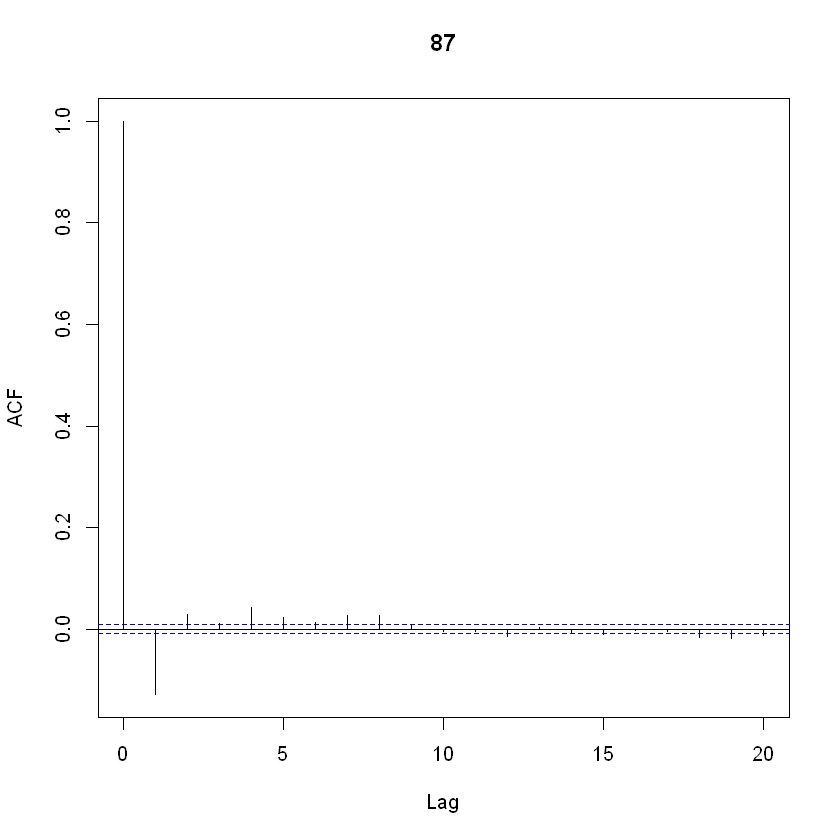

In [69]:
list1 <- c(1, 9, 20, 30, 45, 60, 74, 87)
par(mfrow=c(1, 1))
for (a in list1) {
    # splice for only measurement readings at depth 1m
    df_1m <- subset(df, depth_m==a)
    # Convert the start date string into a POSIXct object
    df_1m$datetime_pst <- as.POSIXct(df_1m$datetime_pst, format='%Y-%m-%d %H:%M:%S')
    # Create the time series
    df_1m_ts <- ts(df_1m$value)
    # impute missing values with the value beofre
    df_1m_ts <- na.locf(df_1m_ts)
    
    #plot(df_1m_ts, main = a, ylab='depth')
    #lag1_diff <- diff(df_1m_ts, lag =1)
    acf_result <- acf(lag1_diff, lag.max = 20, main = a)#, plot = FALSE)
    #print(acf_result)
}